# K-Medoids

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sktime.datasets import load_airline
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.paa import PAA
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.pipeline import make_pipeline

from scipy.spatial.distance import euclidean

from sktime.clustering.k_means import TimeSeriesKMeans
from sktime.utils.plotting import plot_series

In [3]:
def load_npy(time_series):
    with open(time_series, 'rb') as f:
        return np.load(f)

def preparation_ts():
    dir_path = 'time_series/'
    len_threshold = 1280  # threshold length for time series
    
    X, y, ids = [], [], []

    for file in os.listdir(dir_path):
        if os.path.splitext(file)[1] != '.npy':
            continue

        split = file.split("_")  # split the filename
        ids.append(split[0])  # track_id
        y.append(split[1][:-4])  # genre
        ts = load_npy(os.path.join(dir_path, file))
    
        if len(ts) > len_threshold:
            ts = ts[:len_threshold]
        else:
            pad = [ts[-1]] * (len_threshold - len(ts))  # fill with last observation
            ts = np.append(ts, pad)

        X.append(ts)  # append the time series data directly

    X, y, ids = np.array(X), np.array(y), np.array(ids)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create a DataFrame
    df = pd.DataFrame(X)
    df['genre'] = y
    df['track_id'] = ids
    
    # Save the DataFrame to a CSV file
    df.to_csv('time_series_data.csv', index=False)

    return df

df = preparation_ts()

In [4]:
df = df.drop_duplicates(subset='track_id', keep='first')

In [6]:
distance_matrix = np.load('matrix_9864_256_dtw25.npy')

In [14]:

from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn_extra'

In [27]:
from sklearn.metrics import silhouette_score

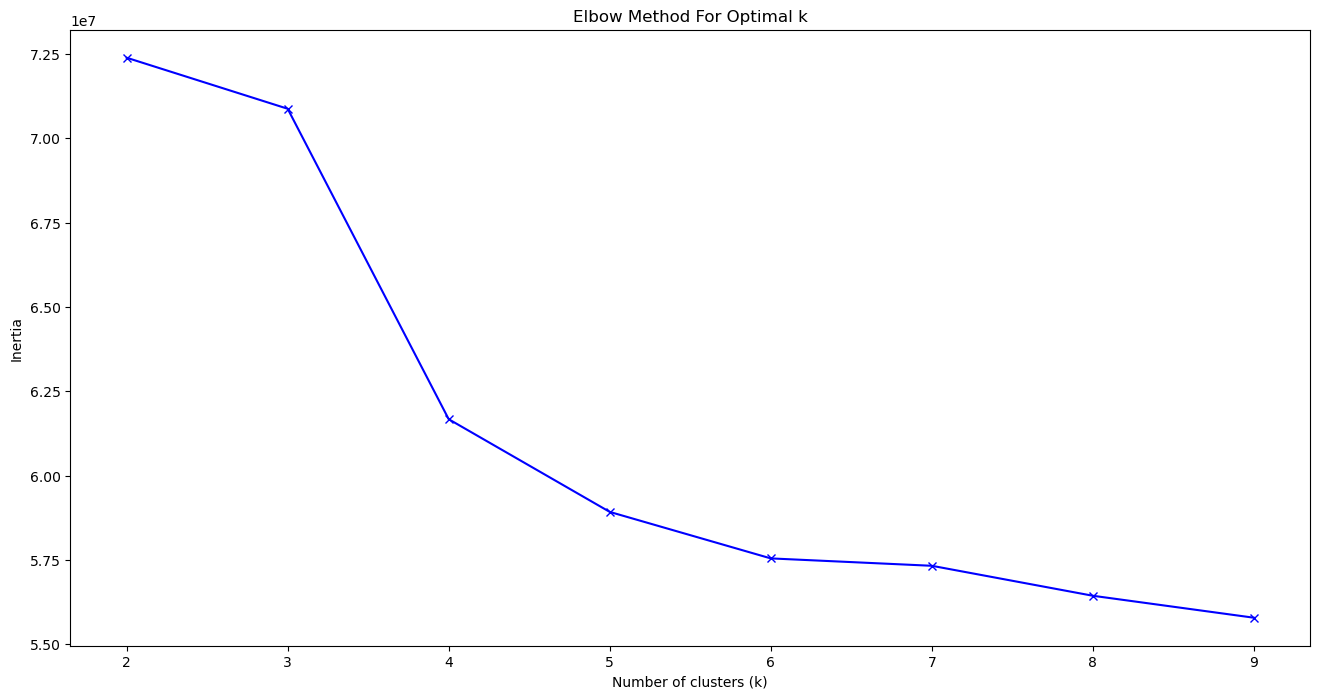

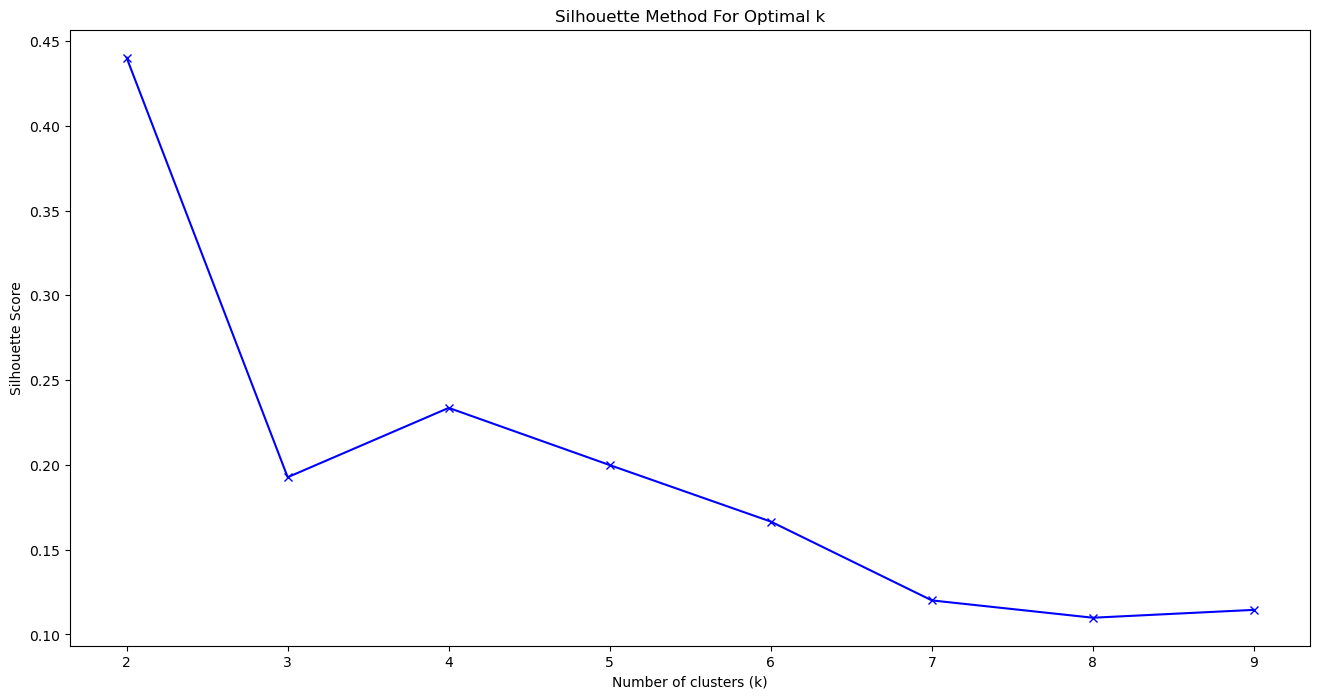

In [44]:
inertia = []
silhouette_scores = []
K = range(2, 10)

for k in K:
    kmedoids = KMedoids(n_clusters=k, metric='precomputed', random_state=42)
    kmedoids.fit(distance_matrix)
    inertia.append(kmedoids.inertia_)
    silhouette_scores.append(silhouette_score(distance_matrix, kmedoids.labels_, metric='precomputed'))

# Plot del Metodo del Gomito
plt.figure(figsize=(16, 8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot del Metodo Silhouette
plt.figure(figsize=(16, 8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

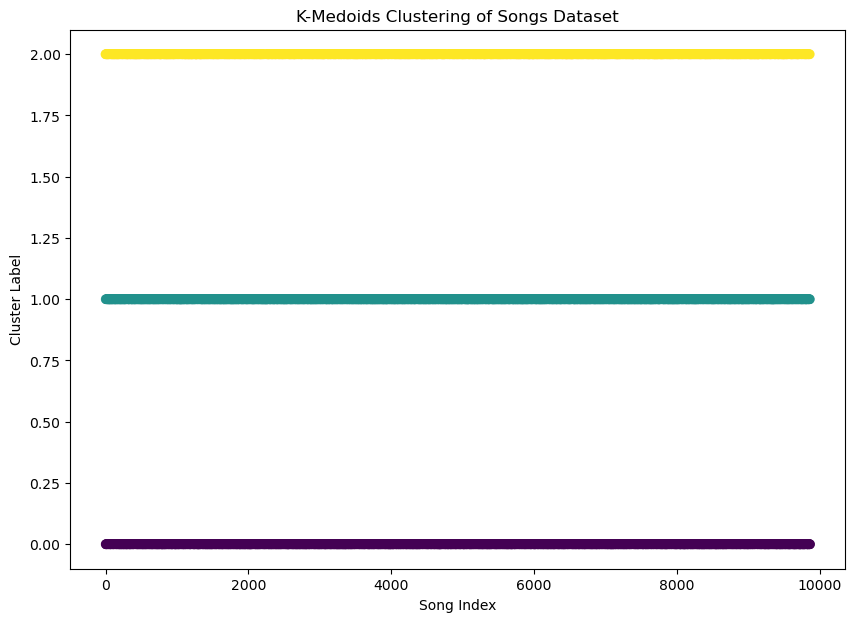

Cluster labels:
[2 2 0 ... 1 0 0]


In [77]:
n_clusters = 3

# Inizializza ed esegui K-Medoids
kmedoids = KMedoids(n_clusters=n_clusters, metric='precomputed', random_state=42)
kmedoids.fit(distance_matrix)

# Ottieni le etichette dei cluster
labels = kmedoids.labels_

# Visualizzazione dei risultati
plt.figure(figsize=(10, 7))
plt.scatter(range(len(labels)), labels, c=labels, cmap='viridis', alpha=0.6)
plt.title('K-Medoids Clustering of Songs Dataset')
plt.xlabel('Song Index')
plt.ylabel('Cluster Label')
plt.show()

print("Cluster labels:")
print(labels)

# tsne

In [78]:
from sklearn.manifold import TSNE

In [79]:
# t-SNE ha bisogno che tutti i nomi delle colonne siano stringhe
df.columns = df.columns.astype(str)

In [80]:
numeric_data = df.iloc[:, :-2]

# Filtra solo le colonne numeriche
numeric_data = numeric_data.select_dtypes(include=[np.number])

# Verifica la selezione delle colonne numeriche
print("Prime righe dei dati numerici:")
print(numeric_data.head())
print("Shape dei dati numerici:")
print(numeric_data.shape)


Prime righe dei dati numerici:
             0            1            2            3            4  \
0  4033.983233  4452.531825  4493.084636  4205.104114  4124.152380   
1  1246.782278  1275.037576  1389.825458  1425.923045  1453.146435   
2   556.527371   570.688219   632.791952   724.284541   700.265785   
3  2318.553884  2415.404641  2587.678594  2679.752782  2476.585990   
4  2197.095845  2299.780004  2340.115366  2230.133271  2162.143986   

             5            6            7            8            9  ...  \
0  4374.528603  4218.922430  4811.479415  5380.497768  5408.836533  ...   
1  1439.394669  1446.677260  1452.278668  1562.862604  1716.595733  ...   
2   637.978949   580.044365   541.837395   538.979271   561.738058  ...   
3  2354.537616  2351.667896  2319.100690  2417.571585  2431.619017  ...   
4  2060.925716  2085.023936  2122.772450  2095.381438  2073.004571  ...   

          1273         1274         1275         1276         1277  \
0  4515.116157  4272.059542

In [81]:
if len(labels) != len(numeric_data):
    print(f"Length of labels ({len(labels)}) does not match length of numeric_data ({len(numeric_data)}). Adjusting...")
    labels = labels[:len(numeric_data)]

# Verifica che le lunghezze siano allineate
print(f"Length of labels: {len(labels)}")
print(f"Length of numeric_data: {len(numeric_data)}")

Length of labels (9864) does not match length of numeric_data (9862). Adjusting...
Length of labels: 9862
Length of numeric_data: 9862


In [82]:
import warnings
warnings.filterwarnings('ignore', message='Could not find the number of physical cores')

In [103]:
# Applica t-SNE con n_jobs=1 per evitare problemi di conteggio dei core
tsne = TSNE(n_components=2, perplexity=5, n_iter=5000, random_state=42, n_jobs=1)
tsne_results = tsne.fit_transform(numeric_data)

In [104]:
# Aggiungi i risultati t-SNE al DataFrame
df['tsne-2d-one'] = tsne_results[:, 0]
df['tsne-2d-two'] = tsne_results[:, 1]
df['cluster'] = labels


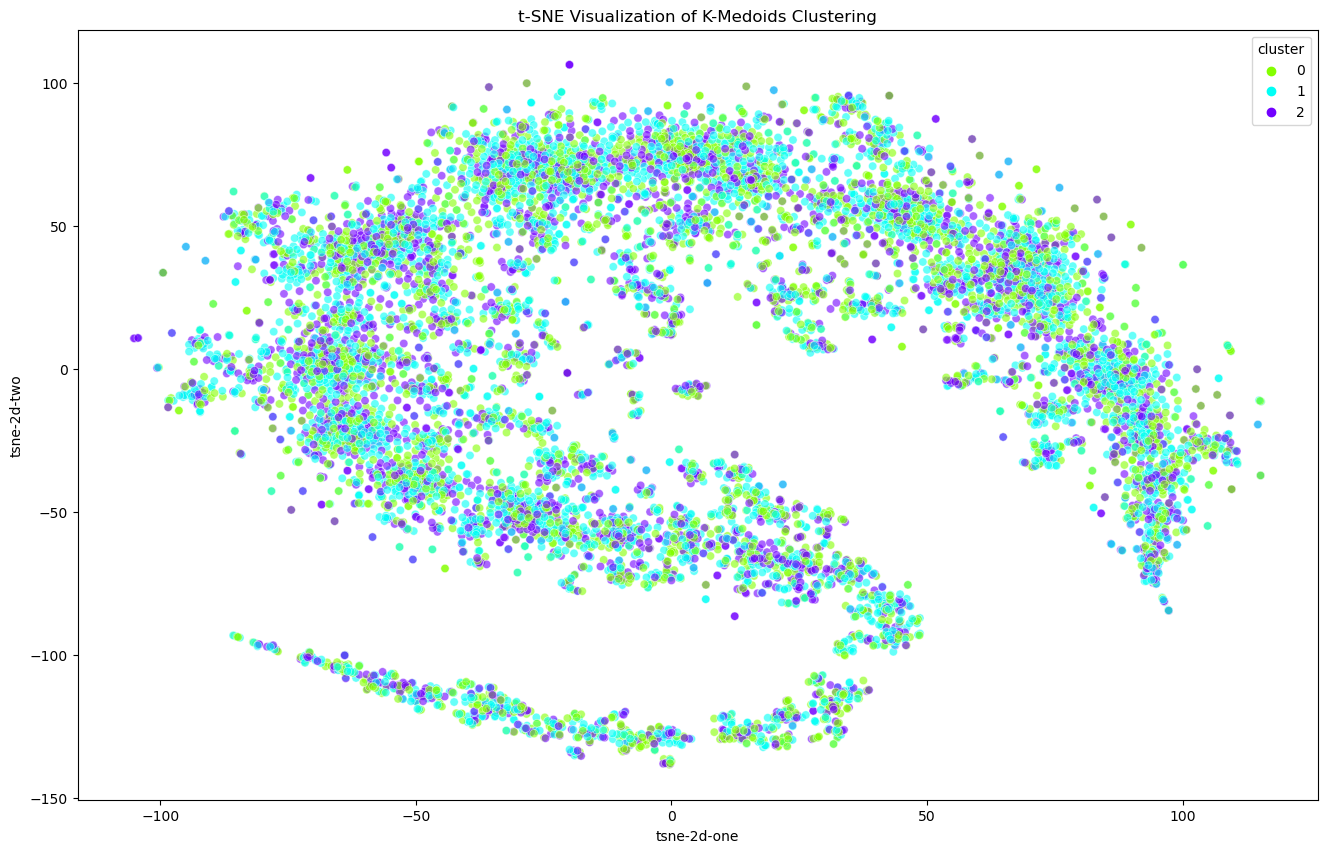

In [105]:
# Visualizza i risultati con un plot a dispersione colorato per cluster
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='cluster',
    palette=sns.color_palette("hsv", n_clusters),
    data=df,
    legend="full",
    alpha=0.6
)
plt.title('t-SNE Visualization of K-Medoids Clustering')
plt.show()


genre    emo  folk  goth  happy  heavy-metal  honky-tonk  j-idol  kids  \
cluster                                                                  
0        171   170   173    136          161         151     167   143   
1        192   202   206    203          207         198     203   211   
2        137   128   121    161          132         150     130   145   

genre    minimal-techno  mpb  new-age  opera  piano  progressive-house  salsa  \
cluster                                                                         
0                   167  148      190    138    169                164    158   
1                   193  207      194    198    182                193    202   
2                   140  142      116    132    124                143    140   

genre    sertanejo  sleep  songwriter  synth-pop  world-music  
cluster                                                        
0              160    158         148        154          172  
1              198    199      

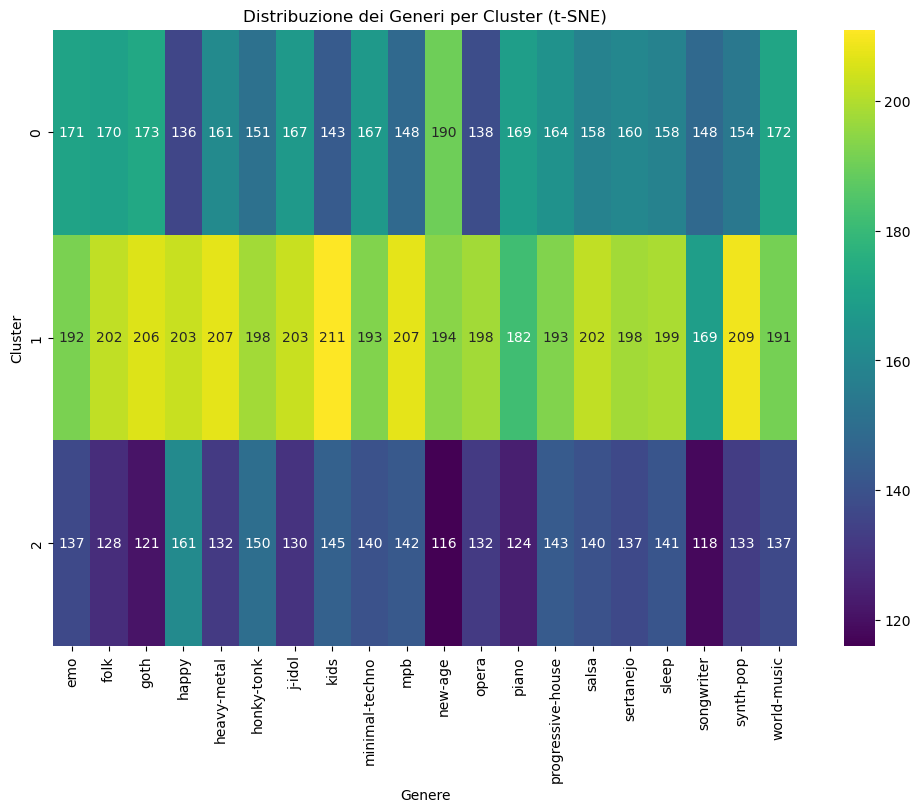

In [106]:
genre_distribution_tsne = df.groupby('cluster')['genre'].value_counts().unstack().fillna(0)

# Stampa la tabella
print(genre_distribution_tsne)

# Salva la tabella come immagine
plt.figure(figsize=(12, 8))
sns.heatmap(genre_distribution_tsne, annot=True, fmt='g', cmap='viridis')
plt.title('Distribuzione dei Generi per Cluster (t-SNE)')
plt.xlabel('Genere')
plt.ylabel('Cluster')
plt.savefig('genre_distribution_tsne.png')
plt.show()

In [94]:
silhouette_tsne = silhouette_score(tsne_results, df['cluster'])
print(f"Silhouette Score con t-SNE: {silhouette_tsne}")

Silhouette Score con t-SNE: -0.008519650436937809


# PCA

In [95]:
from sklearn.decomposition import PCA

In [96]:
# Esegui la PCA
pca = PCA(n_components=3)
pca_results = pca.fit_transform(numeric_data)

In [97]:
# Aggiungi i risultati PCA al DataFrame
df['pca-one'] = pca_results[:, 0]
df['pca-two'] = pca_results[:, 1]
df['cluster'] = labels

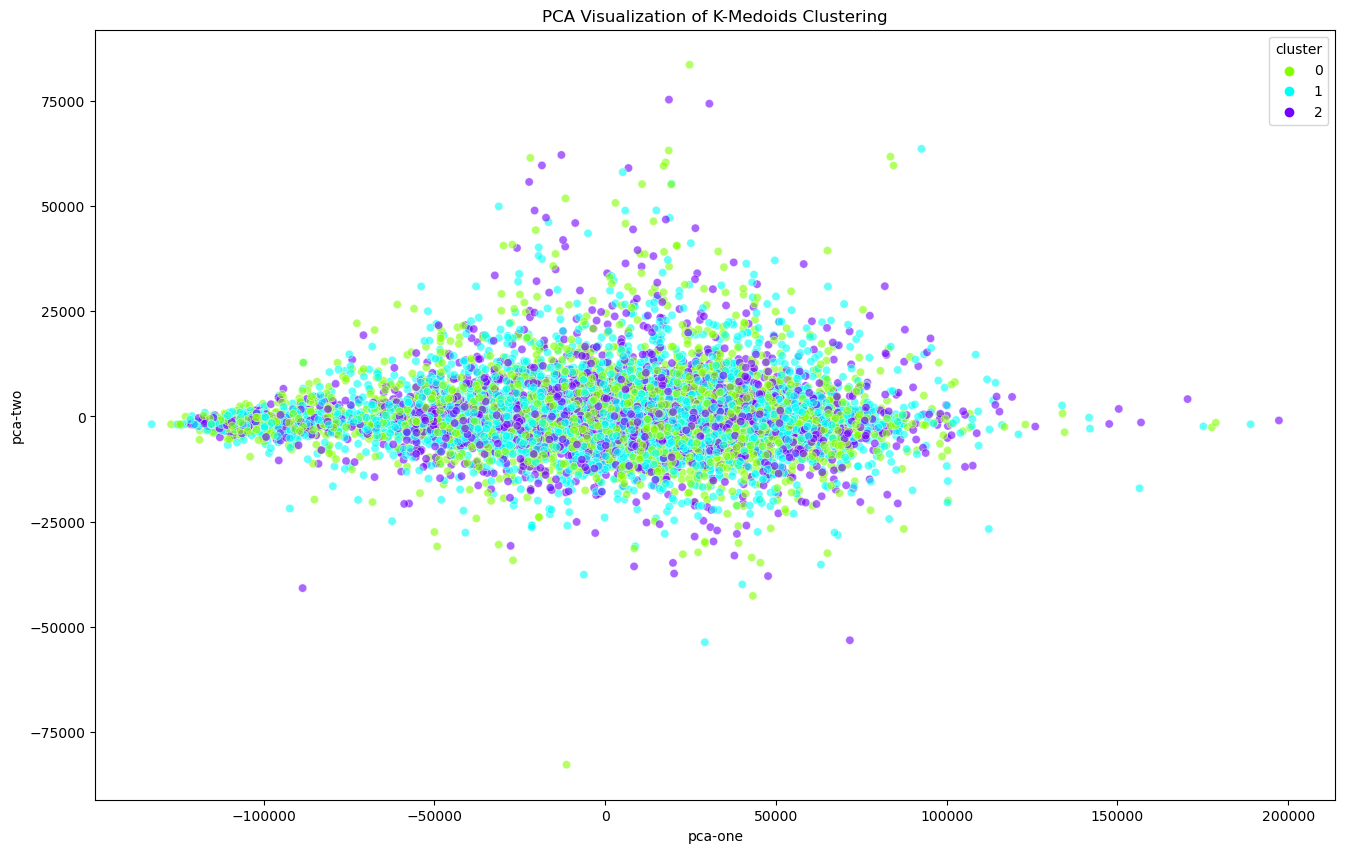

In [98]:
# Visualizza i risultati con un plot a dispersione colorato per cluster
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y='pca-two',
    hue='cluster',
    palette=sns.color_palette("hsv", n_clusters),
    data=df,
    legend="full",
    alpha=0.6
)
plt.title('PCA Visualization of K-Medoids Clustering')
plt.show()

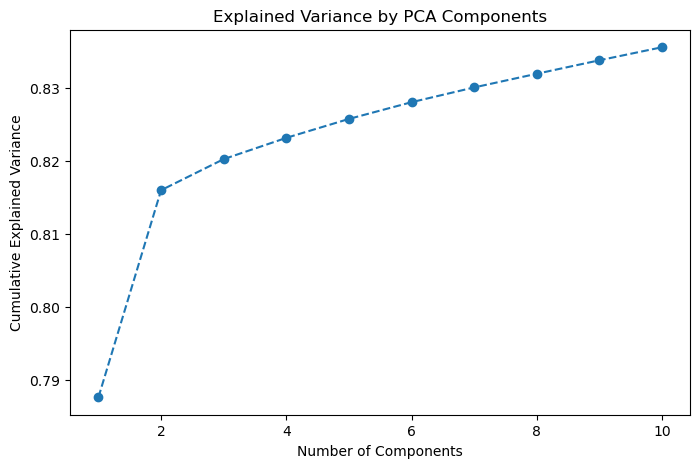

In [99]:
pca = PCA(n_components=10)  # Inizia con 10 componenti
pca.fit(numeric_data)

# Calcola la varianza spiegata cumulativa
explained_variance = pca.explained_variance_ratio_.cumsum()

# Visualizza la varianza spiegata cumulativa
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()


# Mostro i generi con PCA

In [100]:
# Mostra per ogni cluster i generi che contiene
for cluster in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster'] == cluster]['genre'].value_counts())



Cluster 0:
genre
new-age              190
goth                 173
world-music          172
emo                  171
folk                 170
piano                169
j-idol               167
minimal-techno       167
progressive-house    164
heavy-metal          161
sertanejo            160
salsa                158
sleep                158
synth-pop            154
honky-tonk           151
mpb                  148
songwriter           148
kids                 143
opera                138
happy                136
Name: count, dtype: int64

Cluster 1:
genre
kids                 211
synth-pop            209
heavy-metal          207
mpb                  207
goth                 206
happy                203
j-idol               203
folk                 202
salsa                202
sleep                199
honky-tonk           198
sertanejo            198
opera                198
new-age              194
progressive-house    193
minimal-techno       193
emo                  192
world-music  

genre    emo  folk  goth  happy  heavy-metal  honky-tonk  j-idol  kids  \
cluster                                                                  
0        171   170   173    136          161         151     167   143   
1        192   202   206    203          207         198     203   211   
2        137   128   121    161          132         150     130   145   

genre    minimal-techno  mpb  new-age  opera  piano  progressive-house  salsa  \
cluster                                                                         
0                   167  148      190    138    169                164    158   
1                   193  207      194    198    182                193    202   
2                   140  142      116    132    124                143    140   

genre    sertanejo  sleep  songwriter  synth-pop  world-music  
cluster                                                        
0              160    158         148        154          172  
1              198    199      

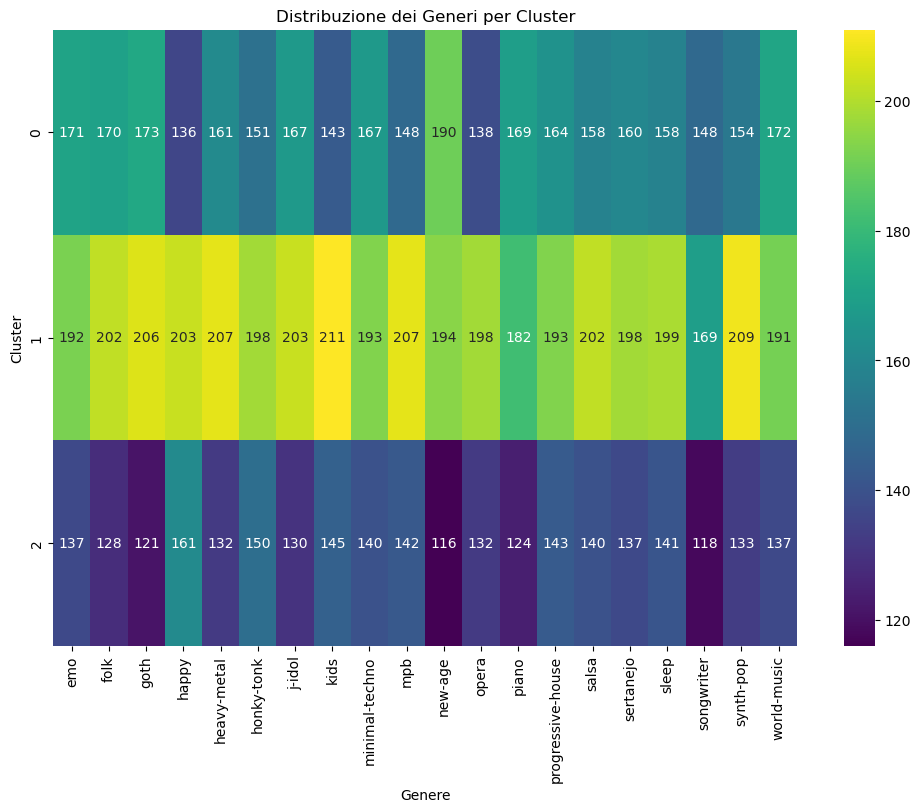

In [101]:
# Crea una tabella che mostri la distribuzione dei generi per ciascun cluster
genre_distribution = df.groupby('cluster')['genre'].value_counts().unstack().fillna(0)

# Stampa la tabella
print(genre_distribution)

# Salva la tabella come immagine
plt.figure(figsize=(12, 8))
sns.heatmap(genre_distribution, annot=True, fmt='g', cmap='viridis')
plt.title('Distribuzione dei Generi per Cluster')
plt.xlabel('Genere')
plt.ylabel('Cluster')
plt.savefig('genre_distribution.png')
plt.show()

# pca euclidean distance per sbaglio

In [114]:
kmedoids_pca = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
labels_pca = kmedoids_pca.fit_predict(pca_results)

In [115]:
silhouette_pca = silhouette_score(pca_results, labels_pca)
print(f"Silhouette Score con PCA: {silhouette_pca}")

Silhouette Score con PCA: 0.33937039551445003
